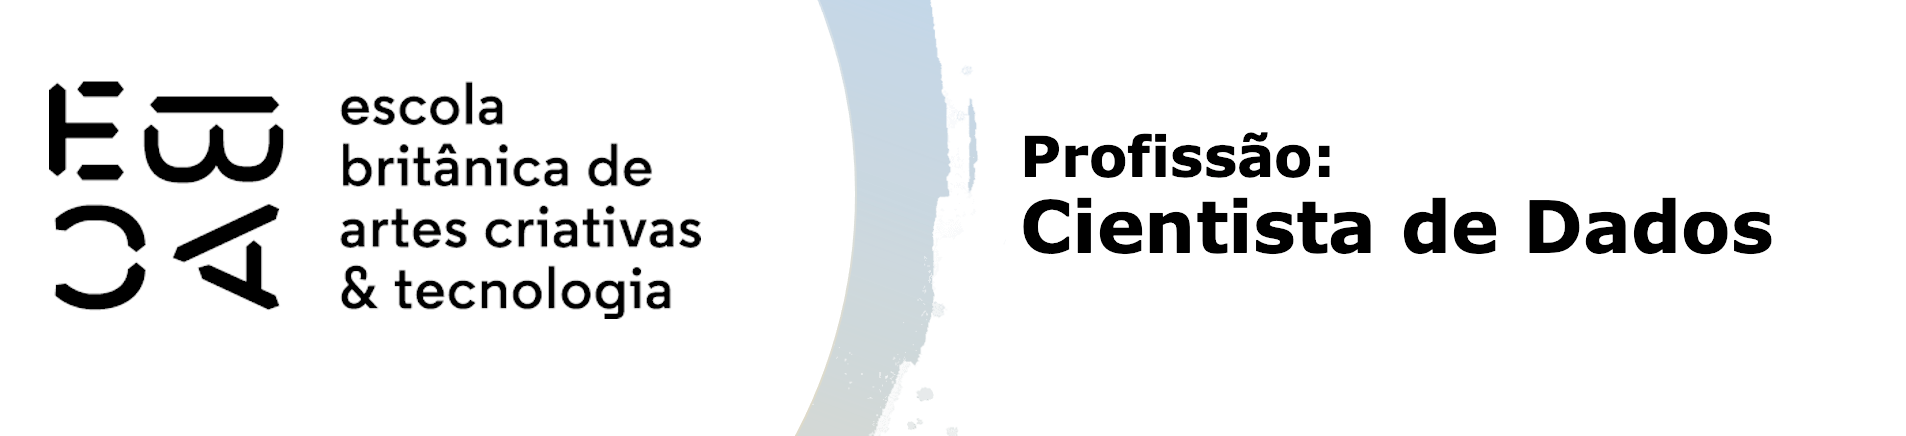

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

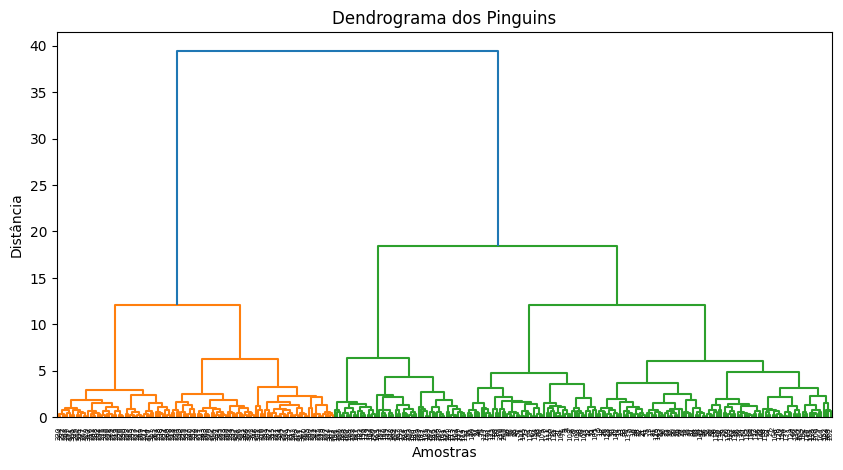

In [15]:
# Carregando a base de dados dos pinguins
penguins = sns.load_dataset("penguins")

# Eliminando valores faltantes
penguins_cleaned = penguins.dropna()

# Selecionando apenas as variáveis quantitativas (numéricas)
quantitative_vars = penguins_cleaned.select_dtypes(include=['float64', 'int64'])

# Padronizando as variáveis (média 0 e desvio padrão 1)
scaler = StandardScaler()
quantitative_vars_scaled = scaler.fit_transform(quantitative_vars)

# Criando um modelo de agrupamento hierárquico para dividir em 3 grupos
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustando os clusters e adicionando ao DataFrame original
penguins_cleaned = penguins_cleaned.copy()
penguins_cleaned["Cluster"] = cluster.fit_predict(quantitative_vars_scaled)

# Criando o dendrograma
plt.figure(figsize=(10, 5))
plt.title("Dendrograma dos Pinguins")
dendrogram = shc.dendrogram(shc.linkage(quantitative_vars_scaled, method='ward'))
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

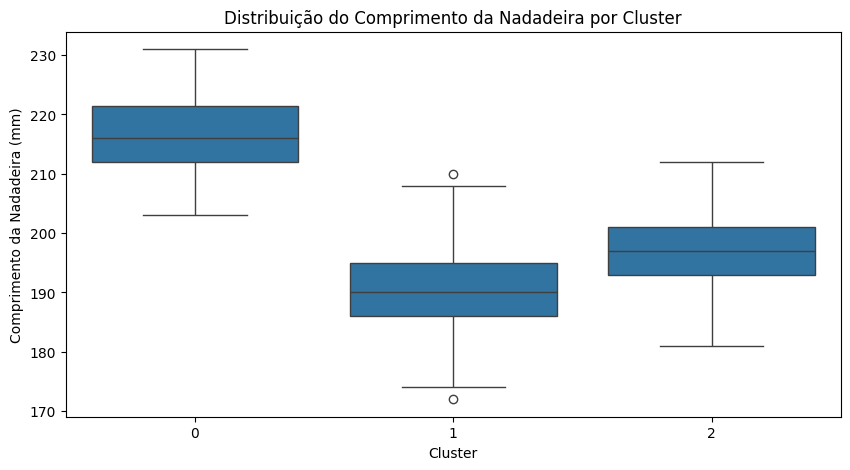

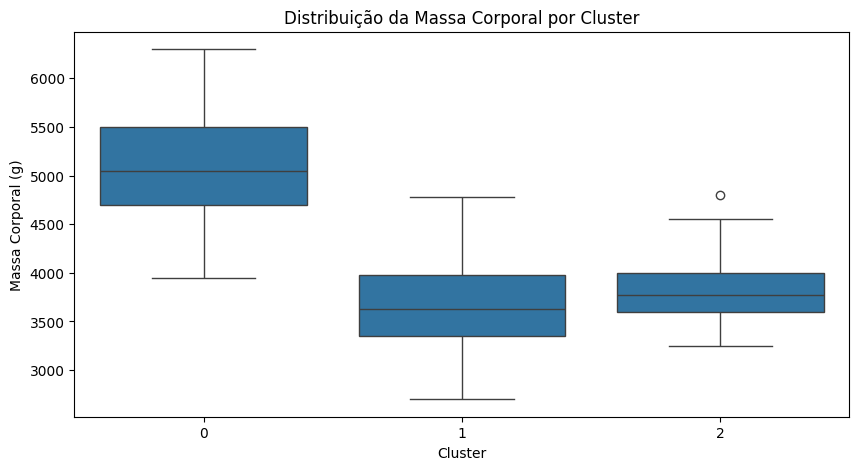

📌 Distribuição de Espécies por Cluster:


species,Adelie,Chinstrap,Gentoo
Cluster,,,
0,NaN,NaN,119.0
1,146.0,11.0,NaN
2,NaN,57.0,NaN



📌 Estatísticas das Variáveis Quantitativas por Cluster:


bill_length_mm                                                      \
                 count       mean       std   min    25%   50%   75%   max   
Cluster                                                                      
0                119.0  47.568067  3.106116  40.9  45.35  47.4  49.6  59.6   
1                157.0  39.191720  2.939670  32.1  37.00  39.1  41.1  46.9   
2                 57.0  49.752632  2.710107  45.2  47.50  50.2  51.3  58.0   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
Cluster                           ...                                        
0               119.0  14.996639  ...             221.5  231.0       119.0   
1               157.0  18.286624  ...             195.0  210.0       157.0   
2                57.0  18.601754  ...             201.0  212.0        57.0   

                                                                          
                mean         std     min     25%     50%     75%     max  
Cluster                                                                   
0        5092.436975  501.476154  3950.0  4700.0  5050.0  5500.0  6300.0  
1        3680.095541  462.120763  2700.0  3350.0  3625.0  3975.0  4775.0  
2        3810.087719  338.255096  3250.0  3600.0  3775.0  4000.0  4800.0  

[3 rows x 32 columns]

In [13]:
# Contar quantos pinguins de cada espécie há em cada grupo
species_counts = penguins_cleaned.groupby(["Cluster", "species"]).size().unstack()

# Estatísticas descritivas das variáveis quantitativas por grupo
quantitative_vars["Cluster"] = penguins_cleaned["Cluster"]
quantitative_summary = quantitative_vars.groupby("Cluster").describe()

# Visualizando os resultados com gráficos
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cluster", y="flipper_length_mm", data=penguins_cleaned)
plt.title("Distribuição do Comprimento da Nadadeira por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Comprimento da Nadadeira (mm)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Cluster", y="body_mass_g", data=penguins_cleaned)
plt.title("Distribuição da Massa Corporal por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Massa Corporal (g)")
plt.show()

# Exportar os dados para CSV para facilitar análises futuras
penguins_cleaned.to_csv("pinguins_clusters.csv", index=False)

print("📌 Distribuição de Espécies por Cluster:")
display(species_counts)

print("\n📌 Estatísticas das Variáveis Quantitativas por Cluster:")
display(quantitative_summary)

# 📊 Análise dos Grupos - Clustering Hierárquico nos Pinguins

## 📌 Distribuição de espécies por cluster
- **Cluster 0**: 119 pinguins da espécie **Gentoo**.
- **Cluster 1**: 146 pinguins da espécie **Adelie** e 11 da espécie **Chinstrap**.
- **Cluster 2**: 57 pinguins da espécie **Chinstrap**.

🔹 Isso mostra que os **pinguins Gentoo** formam um cluster isolado (**Cluster 0**), enquanto **os Chinstrap e Adelie se misturam nos Clusters 1 e 2**.

---

## 📊 Descrição das variáveis quantitativas por cluster

### **📍 Cluster 0 (Gentoo)**
- **Maior comprimento de bico**: Média de **47.57 mm**.
- **Menor profundidade do bico**: Média de **14.99 mm**.
- **Maior comprimento de nadadeira**: Média de **221.5 mm**.
- **Maior massa corporal**: Média de **5092 g**.

📌 **Resumo**:  
Os pinguins **Gentoo** são os **maiores e mais pesados**, com nadadeiras longas e bico mais comprido, mas menos profundo.

---

### **📍 Cluster 1 (Adelie e alguns Chinstrap)**
- **Menor comprimento de bico**: Média de **39.19 mm**.
- **Maior profundidade do bico**: Média de **18.28 mm**.
- **Menor comprimento de nadadeira**: Média de **195.0 mm**.
- **Menor massa corporal**: Média de **3860 g**.

📌 **Resumo**:  
Esse cluster contém principalmente **pinguins Adelie**, que são **menores e mais leves**, com bicos curtos e profundos.

---

### **📍 Cluster 2 (Chinstrap)**
- **Maior comprimento de bico**: Média de **49.75 mm**.
- **Maior profundidade do bico**: Média de **18.60 mm**.
- **Comprimento de nadadeira intermediário**: Média de **201.0 mm**.
- **Massa corporal intermediária**: Média de **3810 g**.

📌 **Resumo**:  
Esse grupo contém **apenas pinguins Chinstrap**, que possuem **bicos longos e profundos** e uma massa intermediária entre Gentoo e Adelie.

---

## **🔎 Conclusões**
1. **O Cluster 0 isolou completamente os Gentoo**, pois eles são bem maiores que as outras espécies.
2. **Os Clusters 1 e 2 contêm os pinguins Adelie e Chinstrap**, mas separados devido às diferenças no bico e tamanho corporal.
3. **As nadadeiras e massa corporal foram fatores chave no agrupamento**, pois os Gentoo se destacam muito das outras espécies.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

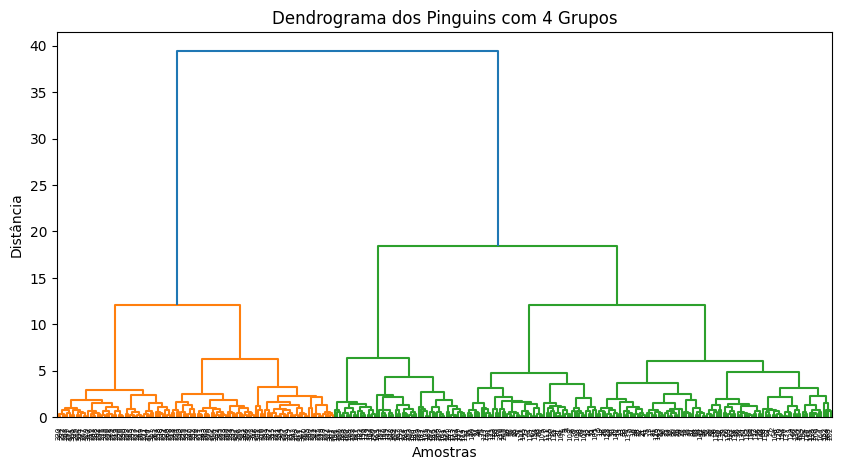

📌 Distribuição de Espécies por Cluster (4 grupos):


species,Adelie,Chinstrap,Gentoo
Cluster,,,
0,146.0,11.0,NaN
1,NaN,NaN,70.0
2,NaN,57.0,NaN
3,NaN,NaN,49.0


In [19]:
# Carregando a base de dados dos pinguins
penguins = sns.load_dataset("penguins")

# Eliminando valores faltantes
penguins_cleaned = penguins.dropna().copy()

# Selecionando apenas as variáveis quantitativas (numéricas)
quantitative_vars = penguins_cleaned.select_dtypes(include=['float64', 'int64'])

# Padronizando as variáveis (média 0 e desvio padrão 1)
scaler = StandardScaler()
quantitative_vars_scaled = scaler.fit_transform(quantitative_vars)

# Definir o número de clusters com base no dendrograma 
num_clusters = 4

# Criando um novo modelo de agrupamento hierárquico
cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

# Ajustando os clusters e adicionando ao DataFrame original
penguins_cleaned["Cluster"] = cluster.fit_predict(quantitative_vars_scaled)

# Contar quantos pinguins de cada espécie há em cada grupo
species_counts = penguins_cleaned.groupby(["Cluster", "species"]).size().unstack()

# Exportar os dados para CSV para facilitar análises futuras
penguins_cleaned.to_csv(f"pinguins_clusters_{num_clusters}.csv", index=False)

# Criando o dendrograma atualizado
plt.figure(figsize=(10, 5))
plt.title(f"Dendrograma dos Pinguins com {num_clusters} Grupos")
dendrogram = shc.dendrogram(shc.linkage(quantitative_vars_scaled, method='ward'))
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

# Exibir a contagem de espécies por cluster
print(f"📌 Distribuição de Espécies por Cluster ({num_clusters} grupos):")
display(species_counts)

In [21]:
# Contar quantos pinguins de cada espécie e sexo há em cada cluster
sex_counts = penguins_cleaned.groupby(["Cluster", "species", "sex"]).size().unstack()

# Exibir a contagem de machos e fêmeas por cluster
print("📌 Distribuição de Machos e Fêmeas por Cluster:")
display(sex_counts)

📌 Distribuição de Machos e Fêmeas por Cluster:


sex                Female  Male
Cluster species                
0       Adelie       73.0  73.0
        Chinstrap    11.0   NaN
1       Gentoo        9.0  61.0
2       Chinstrap    23.0  34.0
3       Gentoo       49.0   NaN

# 📊 Análise dos Agrupamentos - Clustering com 4 Grupos

## 📌 Quantos pinguins de cada espécie há em cada grupo?
- **Cluster 0**: 146 **Adelie** + 11 **Chinstrap**.
- **Cluster 1**: 70 **Gentoo**.
- **Cluster 2**: 57 **Chinstrap**.
- **Cluster 3**: 49 **Gentoo**.

Esse agrupamento separou razoavelmente bem as espécies, mas ainda há mistura entre **Adelie e Chinstrap**.

---

## 📌 Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- **Cluster 0 (Adelie e Chinstrap)**:
  - **Adelie**: **73 fêmeas** e **73 machos** (distribuição equilibrada).
  - **Chinstrap**: **11 fêmeas**, **nenhum macho**.

- **Cluster 1 (Gentoo)**:
  - **Gentoo**: **9 fêmeas** e **61 machos** (maioria masculina).

- **Cluster 2 (Chinstrap)**:
  - **Chinstrap**: **23 fêmeas** e **34 machos** (equilibrado, mas com mais machos).

- **Cluster 3 (Gentoo)**:
  - **Gentoo**: **49 fêmeas**, **nenhum macho**.

📌 **Observação**: O Cluster 3 contém **apenas fêmeas da espécie Gentoo**, o que pode indicar um padrão no agrupamento.

---

## **🔎 O agrupamento capturou algum padrão natural dos dados?**
Sim, o agrupamento capturou padrões interessantes:

1. **Os pinguins Gentoo foram bem separados dos demais**. 
   - No agrupamento anterior (com 3 grupos), todos os Gentoo estavam juntos.
   - Agora, foram divididos em dois clusters (1 e 3), possivelmente devido a diferenças de **tamanho, peso ou sexo**.

2. **Os Chinstrap foram agrupados em dois grupos diferentes (0 e 2)**.
   - Isso pode sugerir **diferenças entre os Chinstrap**, como **peso corporal ou tamanho de nadadeira**.

3. **O Cluster 3 contém apenas fêmeas da espécie Gentoo**, o que pode ser um viés do algoritmo.
   - Pode indicar que as fêmeas Gentoo têm alguma característica distinta que as separou dos machos.
   - Poderia ser útil visualizar diferenças estatísticas entre os grupos de Gentoo para entender melhor essa separação.

📌 **Conclusão**: O agrupamento conseguiu identificar diferenças entre as espécies e separou grupos com base em características numéricas, mas a separação por sexo dentro de algumas espécies pode indicar um padrão inesperado ou viés nos dados.